
# Kelly Criterion Workshop

## Part 1: Developing Intuition

You can run the two cells below to try developing some intuition for potential strategies.

In [ ]:
#@title Background Functions

import numpy as np
import matplotlib.pyplot as plt

def generate_coin_flips(prob_heads, num_trials):
  return list(np.random.binomial(1, prob_heads, num_trials))

class Game:
  def __init__(self, prob_heads, initial_bankroll, odds, num_trials):
    self.prob_heads = prob_heads
    self.odds = odds
    self.num_trials = num_trials
    self.coin_flips = generate_coin_flips(prob_heads, num_trials)
    self.cur_bankroll = initial_bankroll
    self.bankroll_hist = [0 for i in range(self.num_trials)]
  
  def get_wager(self, cur_round):
    print('|- - - - - - - - - Round', cur_round, 'out of', self.num_trials, '- - - - - - - - - -|\n')
    print('Current Bankroll:', self.cur_bankroll,'\n')
    received_wager = False
    wager = 0

    while(not received_wager):
      wager = float(input('Place your wager: '))
      if 0 <= wager and wager <= self.cur_bankroll:
        received_wager = True
      else:
        print('Your wager was invalid. Please ensure your wager is in the range of zero and your current bankroll.')
  
    return wager
  
  def play_game(self):
    cur_round = 1
    
    while self.cur_bankroll >= 0.01 and cur_round <= self.num_trials:
      wager = self.get_wager(cur_round)
      outcome = self.coin_flips[cur_round-1]
      if outcome == 1:
        self.cur_bankroll += self.odds*wager
      else:
        self.cur_bankroll -= wager
      self.bankroll_hist[cur_round-1] = self.cur_bankroll
      cur_round += 1
    
    if self.cur_bankroll < 0.01:
      print('\n|- - - - - - - - - - - - You lost :( - - - - - - - - - -|')
    else:
      print('\nYour final sum of money is:', self.cur_bankroll)

    fig, ax = plt.subplots()

    x = [i+1 for i in range(self.num_trials)]
    y = self.bankroll_hist 

    print('')

    ax.plot(x, y)
    ax.set_title('Bankroll vs. Time')


|- - - - - - - - - Round 1 out of 15 - - - - - - - - - -|

Current Bankroll: 100 

Place your wager: 5
|- - - - - - - - - Round 2 out of 15 - - - - - - - - - -|

Current Bankroll: 105.0 

Place your wager: 5
|- - - - - - - - - Round 3 out of 15 - - - - - - - - - -|

Current Bankroll: 100.0 

Place your wager: 5
|- - - - - - - - - Round 4 out of 15 - - - - - - - - - -|

Current Bankroll: 105.0 

Place your wager: 5
|- - - - - - - - - Round 5 out of 15 - - - - - - - - - -|

Current Bankroll: 110.0 

Place your wager: 5
|- - - - - - - - - Round 6 out of 15 - - - - - - - - - -|

Current Bankroll: 115.0 

Place your wager: 5
|- - - - - - - - - Round 7 out of 15 - - - - - - - - - -|

Current Bankroll: 120.0 

Place your wager: 5
|- - - - - - - - - Round 8 out of 15 - - - - - - - - - -|

Current Bankroll: 115.0 

Place your wager: 5
|- - - - - - - - - Round 9 out of 15 - - - - - - - - - -|

Current Bankroll: 120.0 

Place your wager: 5
|- - - - - - - - - Round 10 out of 15 - - - - - - - - - -

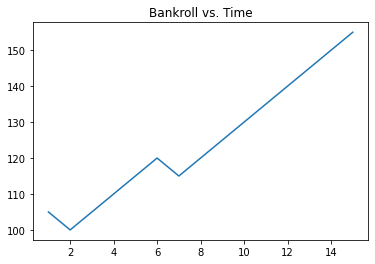

In [ ]:
#@title Simple Game

# Game Parameters
prob_heads = 0.60
initial_bankroll = 1000
odds = 1
num_trials = 15

game = Game(prob_heads, initial_bankroll, odds, num_trials)

game.play_game()



## Part 2: Implementing the Kelly Criterion

Try implementing different strategies via the cell below in the get_wager() function. You can view the success of your simulation by running the second cell below.

Some ideas for strategies to implement are the constant strategy, full kelly, fractional kelly, and anything else you can think of!

In [ ]:
#@title Kelly Implementation

class Simulation:
  def __init__(self, prob_heads, initial_bankroll, odds, num_trials):
    self.prob_heads = prob_heads
    self.odds = odds
    self.num_trials = num_trials
    self.coin_flips = generate_coin_flips(prob_heads, num_trials)
    self.cur_bankroll = initial_bankroll
    self.bankroll_hist = [0 for i in range(self.num_trials)]
  
  def get_wager(self, cur_round):
    # You should implement your strategy here!!
    wager = 100 # Arbitrarily chosen constant to bet
    return wager
  
  def run_simulation(self):
    cur_round = 1
    
    while self.cur_bankroll >= 0.01 and cur_round <= self.num_trials:
      wager = self.get_wager(cur_round)
      outcome = self.coin_flips[cur_round-1]
      if outcome == 1:
        self.cur_bankroll += self.odds*wager
      else:
        self.cur_bankroll -= wager
      self.bankroll_hist[cur_round-1] = self.cur_bankroll
      cur_round += 1
    
    if self.cur_bankroll < 0.01:
      print('\n|- - - - - - - - - - - - You lost :( - - - - - - - - - -|')
    else:
      print('\nYour final sum of money is:', self.cur_bankroll)

    fig, ax = plt.subplots()

    x = [i+1 for i in range(self.num_trials)]
    y = self.bankroll_hist 

    print('')

    ax.plot(x, y)
    ax.set_title('Bankroll vs. Time')



Your final sum of money is: 13400



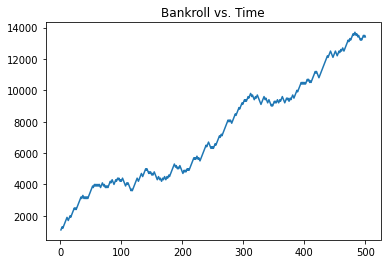

In [ ]:
#@title Run Simulation

# Game Parameters
prob_heads = 0.60
initial_bankroll = 1000
odds = 1
num_trials = 500

game = Simulation(prob_heads, initial_bankroll, odds, num_trials)

game.run_simulation()